In [7]:
import os

In [9]:
os.getcwd()

'C:\\Users\\t08rm24\\OneDrive - University of Aberdeen'

In [8]:
import os

new_directory = r"C:\Users\t08rm24\OneDrive - University of Aberdeen/python work files"
os.chdir(new_directory)


In [10]:
os.getcwd()

'C:\\Users\\t08rm24\\OneDrive - University of Aberdeen\\python work files'

In [19]:
txt_files=[f for f in os.listdir() if f.endswith(".txt")]
print(txt_files)

['Ah3_data_file.txt', 'Alli2r_data_file.txt', 'Alli8_data_file.txt', 'Anap7c1_data_file(1).txt', 'App1l8_data_file.txt', 'App8_data_file.txt', 'Avon1a5_data_file.txt', 'Avon4_data_file.txt', 'Ben3l6_data_file.txt', 'Bma9_data_file.txt', 'Cairn1b8_data_file.txt', 'Cairn3a2_data_file.txt', 'Cairn6_data_file.txt', 'Clach6_data_file.txt', 'Daz2b7_data_file.txt', 'Dsgt9a1_data_file.txt', 'Emco9b6_data_file.txt', 'Euk4r4_data_file.txt', 'Ever6b6_data_file.txt', 'Everr1_data_file.txt', 'Fab6l6_data_file.txt', 'Fab9r3_data_file.txt', 'Ghos8_data_file.txt', 'Gorm6b6_data_file.txt', 'Got9_data_file.txt', 'Ist3_data_file.txt', 'Ist9a2_data_file.txt', 'Ist9a7_data_file.txt', 'Ist9a_data_file.txt', 'Jams9r2_data_file.txt', 'Jok4a3_data_file.txt', 'Jtkir5r8_data_file.txt', 'Jtkir8l4_data_file.txt', 'K2_data_file.txt', 'K7c7_data_file.txt', 'Kl8_data_file.txt', 'Mdor8_data_file.txt', 'Nect1c1_data_file.txt', 'Nect5r3_data_file.txt', 'Oyu3a9_data_file.txt', 'Pear4r9_data_file.txt', 'Pear9a7_data_file.

In [6]:
import os
import pandas as pd

folder_path = r"C:\Users\t08rm24\OneDrive - University of Aberdeen\python work files"
all_data = []  # Initialize the list to store dataframes

for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, sep="\t")
        
        # Optionally add the filename as a source column
        df['source_file'] = filename
        
        all_data.append(df)

# Concatenate all dataframes with reset index
data = pd.concat(all_data, ignore_index=True)

# If you want to create a new index column starting from 1
data.index = range(1, len(data) + 1)

# Or if you want to reset the index and keep the old index as a column
# data = data.reset_index(drop=True)
# data.index = range(1, len(data) + 1)

# Display the data
print(data)

        Gene                                  WildType.Sequence  \
1        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
2     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
3      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
4    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
5     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
6       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
7    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
8      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
9     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
10      Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
11  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
12  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
13    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
14    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [38]:
import pandas as pd

# Assuming combined_df is already loaded

def detect_mutation_type(wildtype, mutant):
    # If the mutant sequence is longer than the wildtype, it's an insertion
    if len(mutant) > len(wildtype):
        return "Insertion"
    # If the mutant sequence is shorter, it's a deletion
    elif len(mutant) < len(wildtype):
        return "Deletion"
    # If the sequences have different nucleotides, it's a substitution
    elif wildtype != mutant:
        return "Substitution"
    else:
        return "No Mutation"  # In case they are identical

# Apply the mutation detection function to the DataFrame
combined_df['Mutation_Type'] = combined_df.apply(
    lambda row: detect_mutation_type(row['WildType.Sequence'], row['Mutant.sequence']),
    axis=1
)

# Display the updated DataFrame with the Mutation_Type column
print(combined_df[['Gene Name', 'WildType.Sequence', 'Mutant.sequence', 'Mutation_Type']].head())


  Gene Name                                  WildType.Sequence  \
0       Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1    Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2     Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3   Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4    App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   

                                     Mutant.sequence Mutation_Type  
0  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...  Substitution  
1  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...     Insertion  
2  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...  Substitution  
3  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...  Substitution  
4  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...     Insertion  


In [40]:
import pandas as pd

# Assuming combined_df is already loaded

def detect_mutation_type(wildtype, mutant):
    # If the mutant sequence is longer than the wildtype, it's an insertion
    if len(mutant) > len(wildtype):
        return "Insertion"
    # If the mutant sequence is shorter, it's a deletion
    elif len(mutant) < len(wildtype):
        return "Deletion"
    # If the sequences have different nucleotides, it's a substitution
    elif wildtype != mutant:
        return "Substitution"
    else:
        return "No Mutation"  # In case they are identical

# Apply the mutation detection function to the entire DataFrame
combined_df['Mutation_Type'] = combined_df.apply(
    lambda row: detect_mutation_type(row['WildType.Sequence'], row['Mutant.sequence']),
    axis=1
)

# Display the updated DataFrame with the Mutation_Type column for all rows
print(combined_df[['Gene Name', 'WildType.Sequence', 'Mutant.sequence', 'Mutation_Type']])


   Gene Name                                  WildType.Sequence  \
0        Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1     Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2      Alli8  TTTACCAGAATCTATAACAGTATATGGCAAAATTCTCCCGCGTACT...   
3    Anap7c1  GGGCGCATAGTAGGCAAGACACCTATTGCTAAAAAACGTCCTGGAC...   
4     App1l8  ATCTTATCGTACACTATTAATAAACTAGCGCTGATTCGAGTCGCTC...   
5       App8  CGGGAAGCTAACTTACTCATAAAGCCCGGTTCGAATAACATTTTGA...   
6    Avon1a5  ACTCCATGGCCATTTACCGGGGATTTCAACGCGATACTCCTTAGAT...   
7      Avon4  TGAATCTAAGATTAAGTGGATATCGCCTTGACTTCTTTATCCATCC...   
8     Ben3l6  CAACTTTAAGGAAGATGGTCGGTGCTTGATTCGTAAATCTGGTGTA...   
9       Bma9  CTACTTCCCCAAGCTCTTGAAATCTCGAAACATATTGTGCTGGTCC...   
10  Cairn1b8  ATCGCTAAGTGTATCCTGCACAGGTTAATAGAATGAGGATATTCGT...   
11  Cairn3a2  GCACTATGGAACAAATCTCCGTAGGATAGCCAGAGTAAATCGGCCT...   
12    Cairn6  GATTGCTAGTGGTAGTGGTGGCCCGGGTCGCCGTCCGCCACTCTTT...   
13    Clach6  AAATGACATCCTCCGGGGAACGATGCAGGCCCAGTAAGCCAATACT..

In [44]:
import pandas as pd

# Assuming combined_df is already loaded

# Define function to calculate fold change (mutant / wild-type)
def calculate_fold_change(wildtype_values, mutant_values):
    # Calculate the mean for each group
    wildtype_mean = wildtype_values.mean()
    mutant_mean = mutant_values.mean()
    
    # Calculate fold change (mutant / wildtype)
    fold_change = mutant_mean / wildtype_mean
    return fold_change

# Calculate fold change for mRNA, protein, and viability
# For mRNA: columns are 'WT_mRNA_1', 'WT_mRNA_2', 'WT_mRNA_3' and 'Mut_mRNA_1', 'Mut_mRNA_2', 'Mut_mRNA_3'
combined_df['mRNA_Fold_Change'] = combined_df.apply(
    lambda row: calculate_fold_change(row[['WT_mRNA_1', 'WT_mRNA_2', 'WT_mRNA_3']],
                                      row[['Mut_mRNA_1', 'Mut_mRNA_2', 'Mut_mRNA_3']]),
    axis=1
)

# For protein: columns are 'WT_protein_1', 'WT_protein_2', 'WT_protein_3' and 'Mut_protein_1', 'Mut_protein_2', 'Mut_protein_3'
combined_df['Protein_Fold_Change'] = combined_df.apply(
    lambda row: calculate_fold_change(row[['WT_protein_1', 'WT_protein_2', 'WT_protein_3']],
                                      row[['Mut_protein_1', 'Mut_protein_2', 'Mut_protein_3']]),
    axis=1
)

# For viability: columns are 'WT_viability_1', 'WT_viability_2', 'WT_viability_3' and 'Mut_viability_1', 'Mut_viability_2', 'Mut_viability_3'
combined_df['Viability_Fold_Change'] = combined_df.apply(
    lambda row: calculate_fold_change(row[['WT_viability_1', 'WT_viability_2', 'WT_viability_3']],
                                      row[['Mut_viability_1', 'Mut_viability_2', 'Mut_viability_3']]),
    axis=1
)

# Display the updated DataFrame with fold change columns
print(combined_df[['Gene Name', 'mRNA_Fold_Change', 'Protein_Fold_Change', 'Viability_Fold_Change']])


   Gene Name  mRNA_Fold_Change  Protein_Fold_Change  Viability_Fold_Change
0        Ah3      1.000000e+00         1.000291e+00               1.109512
1     Alli2r      9.999333e-01         1.000509e+00               0.913688
2      Alli8      9.736473e-01         1.000438e+00               1.120925
3    Anap7c1     -3.973853e+00         4.762385e-01               0.000000
4     App1l8      8.951204e-01         1.000321e+00               0.698508
5       App8      1.025606e+00         1.000453e+00               0.821070
6    Avon1a5      1.004830e+00         1.000586e+00               1.093535
7      Avon4      1.575283e+00         1.567175e+00               9.122350
8     Ben3l6      1.000055e+00         1.001150e+00               1.257140
9       Bma9      1.020000e+00         1.000703e+00               0.690506
10  Cairn1b8      1.004133e+00         1.000963e+00               0.881123
11  Cairn3a2      1.015095e+00         1.000422e+00               1.103582
12    Cairn6      1.00015

In [48]:
from scipy import stats

# Function to perform paired t-test on wild-type and mutant data
def perform_t_test(wildtype_values, mutant_values):
    t_stat, p_value = stats.ttest_rel(wildtype_values, mutant_values)
    return t_stat, p_value

# Perform t-tests for mRNA, protein, and viability (on the 3 replicates)
combined_df['mRNA_t_stat'], combined_df['mRNA_p_value'] = zip(
    *combined_df.apply(
        lambda row: perform_t_test(
            row[['WT_mRNA_1', 'WT_mRNA_2', 'WT_mRNA_3']], 
            row[['Mut_mRNA_1', 'Mut_mRNA_2', 'Mut_mRNA_3']]),
        axis=1
    )
)

combined_df['Protein_t_stat'], combined_df['Protein_p_value'] = zip(
    *combined_df.apply(
        lambda row: perform_t_test(
            row[['WT_protein_1', 'WT_protein_2', 'WT_protein_3']], 
            row[['Mut_protein_1', 'Mut_protein_2', 'Mut_protein_3']]),
        axis=1
    )
)

combined_df['Viability_t_stat'], combined_df['Viability_p_value'] = zip(
    *combined_df.apply(
        lambda row: perform_t_test(
            row[['WT_viability_1', 'WT_viability_2', 'WT_viability_3']], 
            row[['Mut_viability_1', 'Mut_viability_2', 'Mut_viability_3']]),
        axis=1
    )
)

# Display the updated DataFrame with t-statistics and p-values for all rows
print(combined_df[['Gene Name', 'mRNA_t_stat', 'mRNA_p_value', 'Protein_t_stat', 'Protein_p_value', 'Viability_t_stat', 'Viability_p_value']])


   Gene Name  mRNA_t_stat  mRNA_p_value  Protein_t_stat  Protein_p_value  \
0        Ah3    -3.879535      0.060477       -4.157609         0.053271   
1     Alli2r     0.063098      0.955427       -3.421941         0.075815   
2      Alli8     2.466157      0.132513       -2.161730         0.163168   
3    Anap7c1     1.222810      0.345938        2.915038         0.100290   
4     App1l8     1.170453      0.362410       -2.254486         0.152874   
5       App8    -0.112730      0.920540       -2.687728         0.115030   
6    Avon1a5    -1.302626      0.322507       -5.547002         0.030997   
7      Avon4    -3.464970      0.074147       -4.143616         0.053603   
8     Ben3l6    -0.093880      0.933763      -11.258330         0.007797   
9       Bma9    -0.911983      0.458046       -5.633623         0.030093   
10  Cairn1b8    -0.109259      0.922971       -4.061385         0.055616   
11  Cairn3a2    -1.078554      0.393581       -5.764614         0.028799   
12    Cairn6

In [54]:
# Calculate Fold Change: Mutant vs Wildtype (Mean of 3 replicates)
combined_df['mRNA_Fold_Change'] = combined_df[['Mut_mRNA_1', 'Mut_mRNA_2', 'Mut_mRNA_3']].mean(axis=1) / combined_df[['WT_mRNA_1', 'WT_mRNA_2', 'WT_mRNA_3']].mean(axis=1)
combined_df['Protein_Fold_Change'] = combined_df[['Mut_protein_1', 'Mut_protein_2', 'Mut_protein_3']].mean(axis=1) / combined_df[['WT_protein_1', 'WT_protein_2', 'WT_protein_3']].mean(axis=1)
combined_df['Viability_Fold_Change'] = combined_df[['Mut_viability_1', 'Mut_viability_2', 'Mut_viability_3']].mean(axis=1) / combined_df[['WT_viability_1', 'WT_viability_2', 'WT_viability_3']].mean(axis=1)

# Check if the fold change columns are properly calculated
print(combined_df[['Gene Name', 'mRNA_Fold_Change', 'Protein_Fold_Change', 'Viability_Fold_Change']])


   Gene Name  mRNA_Fold_Change  Protein_Fold_Change  Viability_Fold_Change
0        Ah3      1.000000e+00         1.000291e+00               1.109512
1     Alli2r      9.999333e-01         1.000509e+00               0.913688
2      Alli8      9.736473e-01         1.000438e+00               1.120925
3    Anap7c1     -3.973853e+00         4.762385e-01               0.000000
4     App1l8      8.951204e-01         1.000321e+00               0.698508
5       App8      1.025606e+00         1.000453e+00               0.821070
6    Avon1a5      1.004830e+00         1.000586e+00               1.093535
7      Avon4      1.575283e+00         1.567175e+00               9.122350
8     Ben3l6      1.000055e+00         1.001150e+00               1.257140
9       Bma9      1.020000e+00         1.000703e+00               0.690506
10  Cairn1b8      1.004133e+00         1.000963e+00               0.881123
11  Cairn3a2      1.015095e+00         1.000422e+00               1.103582
12    Cairn6      1.00015

In [56]:
# Perform t-tests for mRNA, protein, and viability (on the 3 replicates)
combined_df['mRNA_t_stat'], combined_df['mRNA_p_value'] = zip(
    *combined_df.apply(
        lambda row: perform_t_test(
            row[['WT_mRNA_1', 'WT_mRNA_2', 'WT_mRNA_3']], 
            row[['Mut_mRNA_1', 'Mut_mRNA_2', 'Mut_mRNA_3']]),
        axis=1
    )
)

combined_df['Protein_t_stat'], combined_df['Protein_p_value'] = zip(
    *combined_df.apply(
        lambda row: perform_t_test(
            row[['WT_protein_1', 'WT_protein_2', 'WT_protein_3']], 
            row[['Mut_protein_1', 'Mut_protein_2', 'Mut_protein_3']]),
        axis=1
    )
)

combined_df['Viability_t_stat'], combined_df['Viability_p_value'] = zip(
    *combined_df.apply(
        lambda row: perform_t_test(
            row[['WT_viability_1', 'WT_viability_2', 'WT_viability_3']], 
            row[['Mut_viability_1', 'Mut_viability_2', 'Mut_viability_3']]),
        axis=1
    )
)

# Display the t-test results
print(combined_df[['Gene Name', 'mRNA_t_stat', 'mRNA_p_value', 'Protein_t_stat', 'Protein_p_value', 'Viability_t_stat', 'Viability_p_value']])


   Gene Name  mRNA_t_stat  mRNA_p_value  Protein_t_stat  Protein_p_value  \
0        Ah3    -3.879535      0.060477       -4.157609         0.053271   
1     Alli2r     0.063098      0.955427       -3.421941         0.075815   
2      Alli8     2.466157      0.132513       -2.161730         0.163168   
3    Anap7c1     1.222810      0.345938        2.915038         0.100290   
4     App1l8     1.170453      0.362410       -2.254486         0.152874   
5       App8    -0.112730      0.920540       -2.687728         0.115030   
6    Avon1a5    -1.302626      0.322507       -5.547002         0.030997   
7      Avon4    -3.464970      0.074147       -4.143616         0.053603   
8     Ben3l6    -0.093880      0.933763      -11.258330         0.007797   
9       Bma9    -0.911983      0.458046       -5.633623         0.030093   
10  Cairn1b8    -0.109259      0.922971       -4.061385         0.055616   
11  Cairn3a2    -1.078554      0.393581       -5.764614         0.028799   
12    Cairn6

In [64]:
# Filter genes based on fold change > 2 and p-value < 0.05
filtered_genes = combined_df[
    (combined_df['mRNA_Fold_Change'] > 2) & 
    (combined_df['mRNA_p_value'] < 0.05) &
    (combined_df['Protein_Fold_Change'] > 2) &
    (combined_df['Protein_p_value'] < 0.05) &
    (combined_df['Viability_Fold_Change'] > 2) &
    (combined_df['Viability_p_value'] < 0.05)
]

# Display the filtered genes
print(filtered_genes[['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value', 'Protein_Fold_Change', 'Protein_p_value', 'Viability_Fold_Change', 'Viability_p_value']])


Empty DataFrame
Columns: [Gene Name, mRNA_Fold_Change, mRNA_p_value, Protein_Fold_Change, Protein_p_value, Viability_Fold_Change, Viability_p_value]
Index: []


In [66]:
# Apply a less strict filter for fold change > 1.5 and p-value < 0.05
filtered_genes = combined_df[
    (combined_df['mRNA_Fold_Change'] > 1.5) & 
    (combined_df['mRNA_p_value'] < 0.05) &
    (combined_df['Protein_Fold_Change'] > 1.5) &
    (combined_df['Protein_p_value'] < 0.05) &
    (combined_df['Viability_Fold_Change'] > 1.5) &
    (combined_df['Viability_p_value'] < 0.05)
]

# Display the filtered genes
print(filtered_genes[['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value', 'Protein_Fold_Change', 'Protein_p_value', 'Viability_Fold_Change', 'Viability_p_value']])


Empty DataFrame
Columns: [Gene Name, mRNA_Fold_Change, mRNA_p_value, Protein_Fold_Change, Protein_p_value, Viability_Fold_Change, Viability_p_value]
Index: []


In [68]:
# Apply an even less strict filter for fold change > 1.2 and p-value < 0.05
filtered_genes = combined_df[
    (combined_df['mRNA_Fold_Change'] > 1.2) & 
    (combined_df['mRNA_p_value'] < 0.05) &
    (combined_df['Protein_Fold_Change'] > 1.2) &
    (combined_df['Protein_p_value'] < 0.05) &
    (combined_df['Viability_Fold_Change'] > 1.2) &
    (combined_df['Viability_p_value'] < 0.05)
]

# Display the filtered genes
print(filtered_genes[['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value', 'Protein_Fold_Change', 'Protein_p_value', 'Viability_Fold_Change', 'Viability_p_value']])


Empty DataFrame
Columns: [Gene Name, mRNA_Fold_Change, mRNA_p_value, Protein_Fold_Change, Protein_p_value, Viability_Fold_Change, Viability_p_value]
Index: []


In [70]:
# Check column names to make sure there are no leading/trailing spaces
print(combined_df.columns)

# Check for any missing data in the relevant columns
print(combined_df[['mRNA_Fold_Change', 'Protein_Fold_Change', 'Viability_Fold_Change', 
                   'mRNA_p_value', 'Protein_p_value', 'Viability_p_value']].isnull().sum())

# Check the first few rows of the dataset to ensure values are as expected
print(combined_df.head(10))


Index(['Gene Name', 'WildType.Sequence', 'Mutant.sequence', 'WT_mRNA_1',
       'WT_mRNA_2', 'WT_mRNA_3', 'Mut_mRNA_1', 'Mut_mRNA_2', 'Mut_mRNA_3',
       'WT_protein_1', 'WT_protein_2', 'WT_protein_3', 'Mut_protein_1',
       'Mut_protein_2', 'Mut_protein_3', 'WT_viability_1', 'WT_viability_2',
       'WT_viability_3', 'Mut_viability_1', 'Mut_viability_2',
       'Mut_viability_3', 'mRNA_t_stat', 'mRNA_p_value', 'Protein_t_stat',
       'Protein_p_value', 'Viability_t_stat', 'Viability_p_value',
       'mRNA_Fold_Change', 'Protein_Fold_Change', 'Viability_Fold_Change'],
      dtype='object')
mRNA_Fold_Change         0
Protein_Fold_Change      0
Viability_Fold_Change    0
mRNA_p_value             0
Protein_p_value          0
Viability_p_value        0
dtype: int64
  Gene Name                                  WildType.Sequence  \
0       Ah3  TGCCCGTCGTCAGAGGGTGGACGGTTACTATCAACGTCCGCTTCCA...   
1    Alli2r  TTCTAACATGCGATCCTAGCGAGGGTTGTGTCGGACGTGAGCGGTG...   
2     Alli8  TTTACCAGAATCTA

In [80]:
# Sort by mRNA p-value in ascending order (smallest p-value indicates highest significance)
top_5_mrna_p_value = combined_df[['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value']].sort_values('mRNA_p_value').head(5)
print(top_5_mrna_p_value)


   Gene Name  mRNA_Fold_Change  mRNA_p_value
14    Daz2b7          1.009245      0.044330
34      K7c7          0.983971      0.052159
38   Nect5r3          1.005329      0.059877
0        Ah3          1.000000      0.060477
7      Avon4          1.575283      0.074147


In [82]:
# Sort by mRNA fold change in descending order and pick the top 5
top_5_mrna = combined_df[['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value']].sort_values('mRNA_Fold_Change', ascending=False).head(5)
print(top_5_mrna)


   Gene Name  mRNA_Fold_Change  mRNA_p_value
30    Jok4a3          1.714066      0.158114
7      Avon4          1.575283      0.074147
32  Jtkir8l4          1.222712      0.285546
15   Dsgt9a1          1.099419      0.381058
25      Ist3          1.083015      0.115102


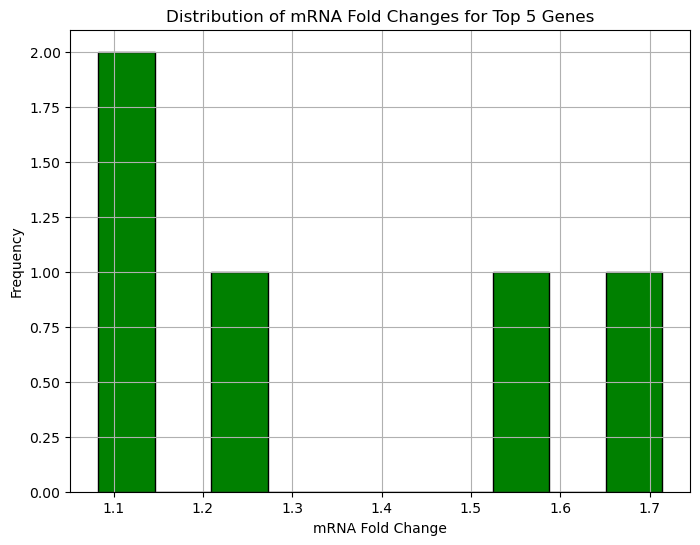

In [89]:
import matplotlib.pyplot as plt

# Plot histogram for mRNA fold changes of the top 5 genes
plt.figure(figsize=(8, 6))
plt.hist(top_5_mrna['mRNA_Fold_Change'], bins=10, color='green', edgecolor='black')
plt.title('Distribution of mRNA Fold Changes for Top 5 Genes')
plt.xlabel('mRNA Fold Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [99]:
# Check column names in the DataFrame
print(top_5_mrna.columns)


Index(['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value'], dtype='object')


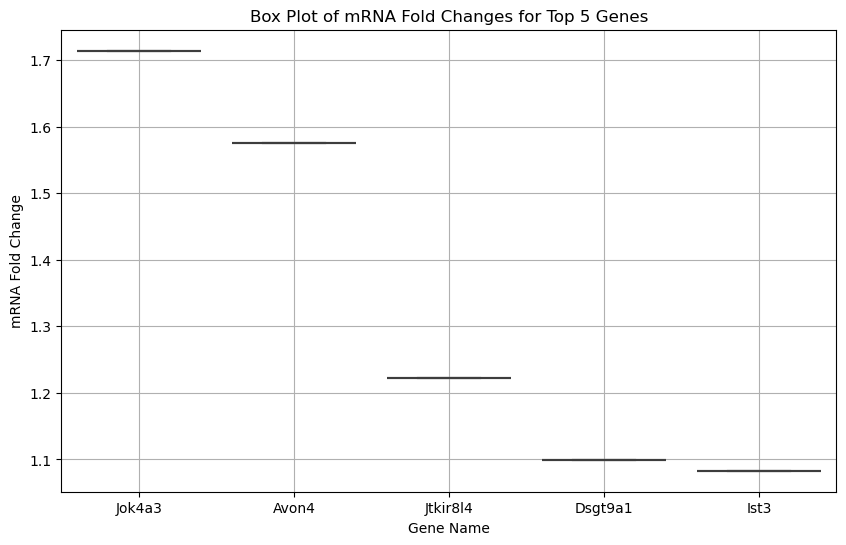

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for boxplot (only mRNA data)
df_fold_changes = top_5_mrna[['Gene Name', 'mRNA_Fold_Change']]

# Melt the data into a long format (for boxplot)
df_fold_changes_melted = df_fold_changes.melt(id_vars=['Gene Name'], 
                                              value_vars=['mRNA_Fold_Change'], 
                                              var_name='Condition', value_name='Fold Change')

# Plot the box plot for mRNA fold changes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gene Name', y='Fold Change', data=df_fold_changes_melted)
plt.title('Box Plot of mRNA Fold Changes for Top 5 Genes')
plt.xlabel('Gene Name')
plt.ylabel('mRNA Fold Change')
plt.grid(True)
plt.show()


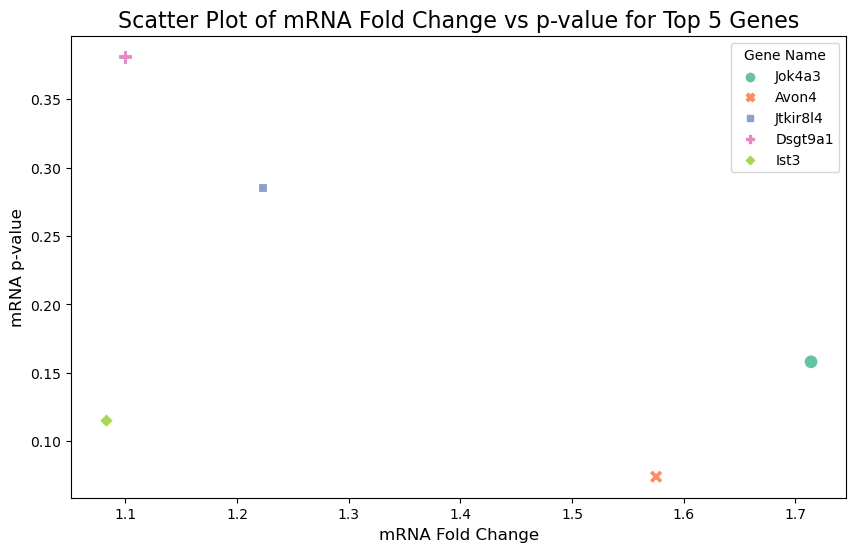

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for scatter plot
df_scatter = top_5_mrna[['Gene Name', 'mRNA_Fold_Change', 'mRNA_p_value']]

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mRNA_Fold_Change', y='mRNA_p_value', hue='Gene Name', style='Gene Name', data=df_scatter, palette='Set2', s=100)

# Add title and labels
plt.title('Scatter Plot of mRNA Fold Change vs p-value for Top 5 Genes', fontsize=16)
plt.xlabel('mRNA Fold Change', fontsize=12)
plt.ylabel('mRNA p-value', fontsize=12)

# Display the plot
plt.show()
